In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv("AI & ML Intern Dataset Task 3.csv")
df_copy=df.copy()
df_copy.head()

,customer_id,age,gender,education_level,monthly_income,years_of_experience,department,hours_per_week,performance_score,promotion
0,471,56.0,Female,NaN,82054.194089,2,Finance,22.0,2.605772,0
1,430,36.0,Female,Master,67373.189627,30,HR,37.0,1.137038,0
2,457,39.0,Female,PhD,118410.055680,16,Finance,31.0,2.169497,0
3,123,52.0,Female,Master,66359.985271,31,Marketing,54.0,3.054573,0
4,353,20.0,Female,Master,125378.356857,9,HR,37.0,1.385404,0


In [25]:
print(df_copy.isnull().sum())

customer_id             0
age                    40
gender                  0
education_level        40
monthly_income         40
years_of_experience     0
department              0
hours_per_week         40
performance_score      40
promotion               0
dtype: int64


In [26]:
df_copy['age'].fillna(df_copy['age'].median(),inplace=True)
df_copy["education_level"].fillna(df_copy["education_level"].mode()[0], inplace=True)
df_copy["monthly_income"].fillna(df_copy["monthly_income"].median(),inplace=True)
df_copy["hours_per_week"].fillna(df_copy["hours_per_week"].median(),inplace=True)
df_copy["performance_score"].fillna(df_copy["performance_score"].median(),inplace=True)

In [27]:
print(df_copy.isnull().sum())

customer_id            0
age                    0
gender                 0
education_level        0
monthly_income         0
years_of_experience    0
department             0
hours_per_week         0
performance_score      0
promotion              0
dtype: int64


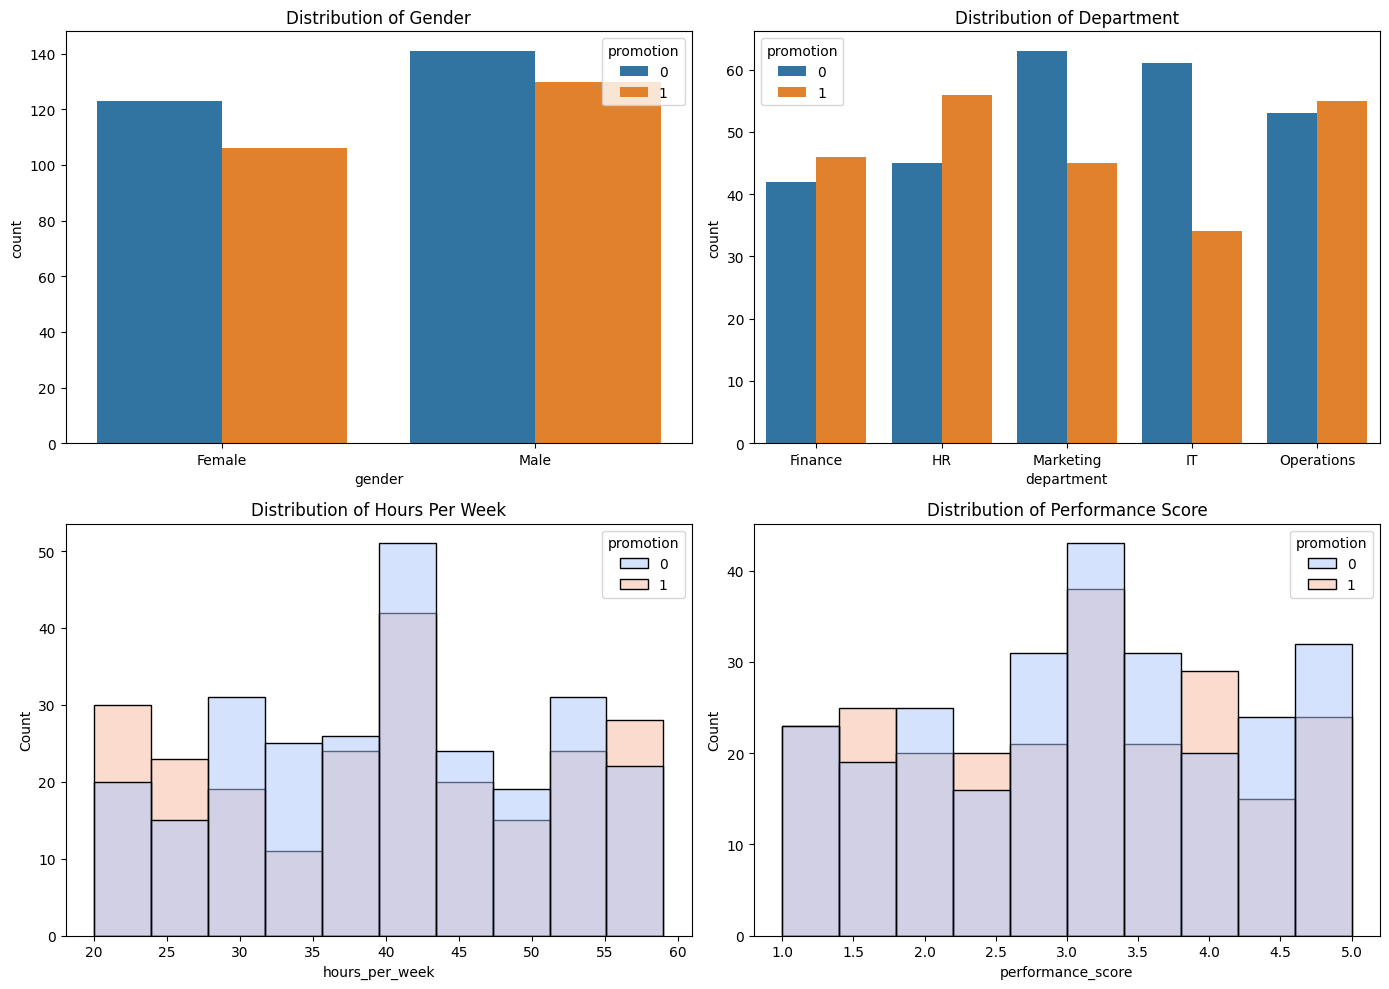

In [28]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.countplot(data=df_copy, x="gender", hue="promotion")
plt.title("Distribution of Gender")

plt.subplot(2,2,2)
sns.countplot(data=df_copy, x="department", hue="promotion")
plt.title("Distribution of Department")

plt.subplot(2,2,3)
sns.histplot(data=df_copy, x="hours_per_week", bins=10,hue="promotion",palette="coolwarm")
plt.title("Distribution of Hours Per Week")

plt.subplot(2,2,4)
sns.histplot(data=df_copy, x="performance_score", bins=10,hue="promotion",palette="coolwarm")
plt.title("Distribution of Performance Score")

plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_copy["gender"]=le.fit_transform(df_copy["gender"])
df_copy["education_level"]=le.fit_transform(df_copy["education_level"])
df_copy["department"]=le.fit_transform(df_copy["department"])

In [31]:
df_copy.drop("customer_id",axis=1,inplace=True)

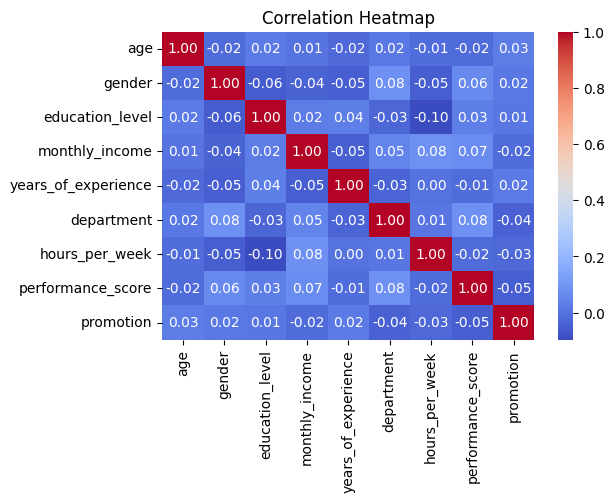

In [32]:
corr=df_copy.corr()
plt.figure(figsize=(6,4))
sns.heatmap(data=corr,cmap="coolwarm",annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
features=['age', 'gender', 'education_level', 'monthly_income',
       'years_of_experience', 'department', 'hours_per_week',
       'performance_score']
x=df_copy[features]
y=df_copy["promotion"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
model.fit(x_train, y_train)
print("Train Accuracy:", model.score(x_train, y_train))
print("Test Accuracy:", model.score(x_test, y_test))
rf_pred=model.predict(x_test)


Train Accuracy: 0.9675
Test Accuracy: 0.53


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.55      0.60      0.58        53
           1       0.50      0.45      0.47        47

    accuracy                           0.53       100
   macro avg       0.53      0.53      0.52       100
weighted avg       0.53      0.53      0.53       100



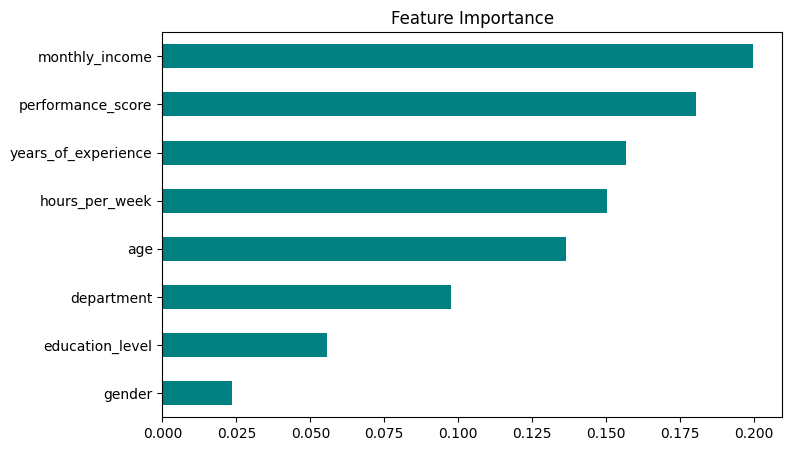

In [41]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=x_train.columns).sort_values(ascending=True)
    
plt.figure(figsize=(8,5))
feat_importance.plot(kind='barh', color='teal')
plt.title("Feature Importance")
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(df_copy[features])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=LogisticRegression(max_iter=1000,random_state=42,class_weight="balanced")
model.fit(x_train,y_train)
log_predict=model.predict(x_test)
print(classification_report(y_test,log_predict))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        53
           1       0.43      0.38      0.40        47

    accuracy                           0.47       100
   macro avg       0.46      0.47      0.46       100
weighted avg       0.47      0.47      0.47       100



In [43]:
from sklearn.svm import SVC
svm = SVC(
    kernel='rbf',
    probability=True,
    random_state=42
)
model.fit(x_train,y_train)
svm_pred=model.predict(x_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        53
           1       0.43      0.38      0.40        47

    accuracy                           0.47       100
   macro avg       0.46      0.47      0.46       100
weighted avg       0.47      0.47      0.47       100



In [44]:
from xgboost import XGBClassifier
model = XGBClassifier(  n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42,
    eval_metric="logloss"
)
model.fit(x_train,y_train)
xgb_predict=model.predict(x_test)
print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        53
           1       0.49      0.47      0.48        47

    accuracy                           0.52       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.52      0.52      0.52       100



In [45]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,
    weights="uniform",
    algorithm="auto",
    leaf_size=30,
    p=2,
    metric="minkowski",
    n_jobs=-1
)
model.fit(x_train,y_train)
knn_predict=model.predict(x_test)
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        53
           1       0.49      0.47      0.48        47

    accuracy                           0.52       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.52      0.52      0.52       100

